# Modelos de proyección de demanda Codelin

## Demostración grafica de los datos

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Tu data ya está en df3 y ya tienes definidas X_df3 y Y_df3.

# Dividir los datos en conjuntos de entrenamiento y prueba
X_traind3, X_testd3, y_traind3, y_testd3 = train_test_split(X_df3, Y_df3, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
decision_tree3 = DecisionTreeRegressor(random_state=42)
decision_tree3.fit(X_traind3, y_traind3)

# Realizar predicciones con el conjunto de prueba
Y_pred_df3 = decision_tree3.predict(X_testd3)

# Asegurarse de que la columna de fecha es del tipo datetime y extraer año y mes
df3['fecha'] = pd.to_datetime(df3['fecha'])
df3['anio'] = df3['fecha'].dt.year
df3['mes'] = df3['fecha'].dt.month

# Agregar las predicciones y los valores reales al conjunto de prueba para la comparación
X_testd3['cantidad_pred'] = Y_pred_df3
X_testd3['cantidad_real'] = y_testd3

# Asociar la fecha con el conjunto de prueba para agrupar por año y mes
X_testd3 = X_testd3.join(df3.set_index(['anio', 'mes']), on=['anio', 'mes'], rsuffix='_original')

# Agrupar por año y mes y sumar las cantidades reales y predichas
grouped = X_testd3.groupby(['anio', 'mes']).agg({'cantidad_pred': 'sum', 'cantidad_real': 'sum'}).reset_index()

# Crear el gráfico de cantidades reales vs. proyecciones por mes y año
plt.figure(figsize=(12, 6))
plt.plot(grouped['anio'].astype(str) + '-' + grouped['mes'].astype(str), grouped['cantidad_pred'], label='Predicción', marker='o')
plt.plot(grouped['anio'].astype(str) + '-' + grouped['mes'].astype(str), grouped['cantidad_real'], label='Real', marker='x')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad')
plt.title('Sumatoria de Cantidad por Mes y Año (Prueba)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta la trama para asegurar que todo encaje sin superposición
plt.show()


: 

# Arboles de decision con parametros modificados

In [93]:
df4 = pd.read_csv("EDA_factorizado1.csv")

In [94]:
from sklearn.model_selection import train_test_split

X = df4.drop(['cantidad', 'fecha'], axis=1)  # Excluyendo 'cantidad' y 'fecha'
y = df4['cantidad']

# Dividir los datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

# Crear y entrenar el modelo
decision_tree3 = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=20, random_state=42)
decision_tree3.fit(X_train, y_train)

# Predicciones
y_pred_train = decision_tree3.predict(X_train)
y_pred_test = decision_tree3.predict(X_test)
y_pred_full = decision_tree3.predict(X)

In [96]:
# Métricas para el conjunto de entrenamiento
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

# Métricas para el conjunto de prueba
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

# Imprimir los resultados
print(f"Conjunto de Entrenamiento - R2: {r2_train:.2f}, MSE: {mse_train:.2f}, MAPE: {mape_train:.2f}")
print(f"Conjunto de Prueba - R2: {r2_test:.2f}, MSE: {mse_test:.2f}, MAPE: {mape_test:.2f}")

# Realizar predicciones con el conjunto de prueba
Y_pred_df3 = decision_tree3.predict(X_test)

# Evaluar el modelo
r2_test1 = r2_score(y_test, y_pred_test)
mse_test1 = mean_squared_error(y_test, y_pred_test)
mape_test1 = mean_absolute_percentage_error(y_test, y_pred_test)
r2_test1, mse_test1, mape_test1

r2_train1 = r2_score(y_train, y_pred_train)
mse_train1 = mean_squared_error(y_train, y_pred_train)
mape_train1 = mean_absolute_percentage_error(y_train, y_pred_train)
r2_train1, mse_train1, mape_train1



Conjunto de Entrenamiento - R2: 0.53, MSE: 0.46, MAPE: 0.62
Conjunto de Prueba - R2: 0.55, MSE: 0.47, MAPE: 0.62


(0.5316240823954578, 0.4622401368992069, 0.6174008577213279)

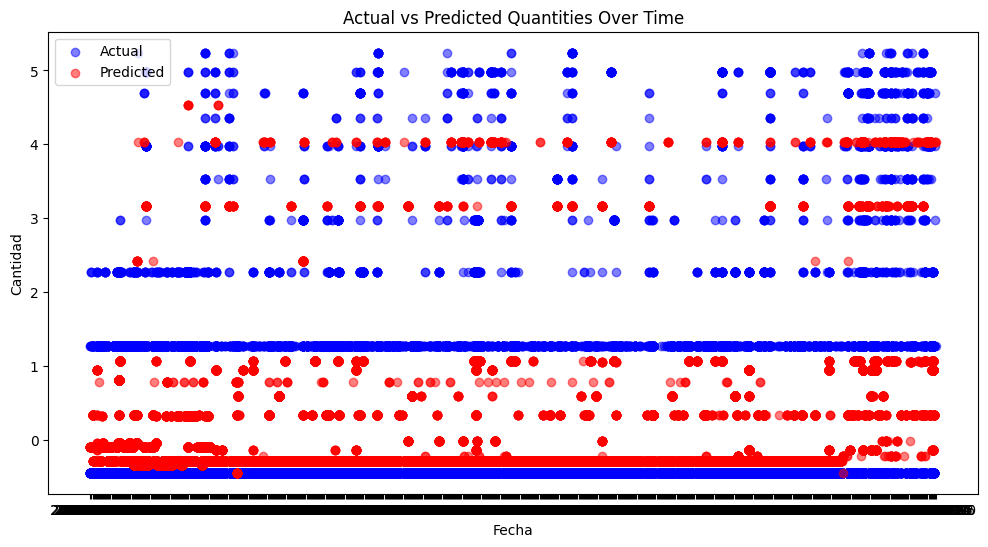

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Preparing the data for the model
X = df4.drop(['cantidad', 'fecha'], axis=1)  # Excluding 'cantidad' and 'fecha'
y = df4['cantidad']

# Splitting the data (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the decision tree model
decision_tree3 = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=6, max_leaf_nodes=20, random_state=42)
decision_tree3.fit(X_train, y_train)

# Making predictions on the test set
y_pred_test = decision_tree3.predict(X_test)

# Add the predictions back to the test DataFrame
X_test['predicted'] = y_pred_test
X_test['actual'] = y_test

df_test_with_dates = df4[df4.index.isin(X_test.index)].copy()
df_test_with_dates['predicted'] = X_test['predicted']
df_test_with_dates['actual'] = X_test['actual']

# Plotting the actual vs predicted values over time
plt.figure(figsize=(12, 6))
plt.scatter(df_test_with_dates['fecha'], df_test_with_dates['actual'], color='blue', label='Actual', alpha=0.5)
plt.scatter(df_test_with_dates['fecha'], df_test_with_dates['predicted'], color='red', label='Predicted', alpha=0.5)
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Actual vs Predicted Quantities Over Time')
plt.legend()
plt.show()




# Aplicación boosting con libreria CatBoost

In [63]:
df = pd.read_csv('EDA_sin_outliers1.csv')
X = df.drop(['cantidad', 'fecha'], axis=1)  # Excluyendo 'cantidad' y 'fecha'
Y = df['cantidad']

In [64]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, explained_variance_score
import numpy as np

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instanciar CatBoost
cb_reg1 = CatBoostRegressor(
    learning_rate=0.1,
    depth=5,
    l2_leaf_reg=10,  # Equivalente al parámetro alpha en XGBoost
    iterations=10,   # Equivalente al n_estimators en XGBoost
    random_seed=42,
    verbose=False    # Ponerlo en True si quieres ver la salida mientras entrena
)
cat_features = ['talla', 'color', 'coleccion', 'categoria', 'linea', 'ciudad', 'refext', 'clase de cliente']
# Entrenar el modelo
cb_reg1.fit(X_train1, y_train1, cat_features=cat_features)  # Asegúrate de definir 'cat_features'

# Predecir en el conjunto de prueba
y_pred1 = cb_reg1.predict(X_test1)

# Evaluar el modelo
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1)
print("RMSE: %f" % (rmse1))

# Calcular MAE
mae1 = mean_absolute_error(y_test1, y_pred1)
print("MAE:", mae1)

# Calcular MSE
mse1 = mean_squared_error(y_test1, y_pred1)
print("MSE:", mse1)

# Calcular R-squared
r2_1 = r2_score(y_test1, y_pred1)
print("R-squared:", r2_1)

# Calcular Explained Variance Score
explained_variance1 = explained_variance_score(y_test1, y_pred1)
print("Explained Variance Score:", explained_variance1)

# Calcular MAPE
def mean_absolute_percentage_error(y_true1, y_pred1): 
    y_true1, y_pred1 = np.array(y_true1), np.array(y_pred1)
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

mape1 = mean_absolute_percentage_error(y_test1, y_pred1)
print("MAPE:", mape1)


RMSE: 0.770208
MAE: 0.4106976578724508
MSE: 0.5932202718763628
R-squared: 0.5199362220064045
Explained Variance Score: 0.519971668003556
MAPE: 26.45350483442029


In [65]:
Y_pred_full1 = cb_reg1.predict(X)

In [66]:
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

In [67]:
# Agregar las predicciones al DataFrame
df['proyeccion'] = Y_pred_full1

# Agrupar los datos originales y sumar las cantidades reales
df_agrupado_real = df.groupby(['anio', 'mes'])['cantidad'].sum().reset_index()

# Agrupar y sumar las proyecciones
df_agrupado_proyeccion = df.groupby(['anio', 'mes'])['proyeccion'].sum().reset_index()

# Fusionar los resultados reales y las proyecciones
df_agrupado = pd.merge(df_agrupado_real, df_agrupado_proyeccion, on=['anio', 'mes'])

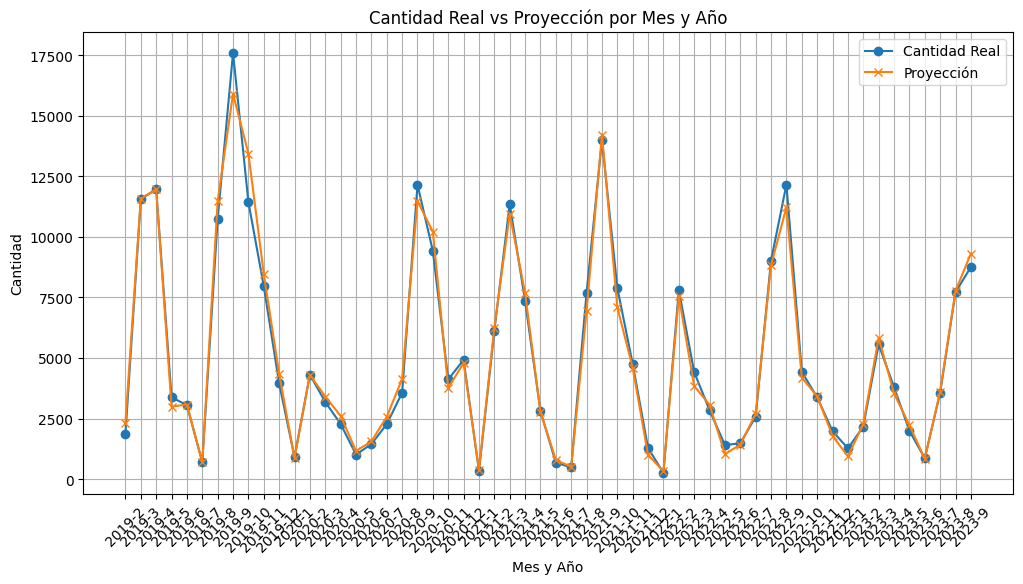

In [68]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'fecha' to datetime format and extract year and month
df4['fecha'] = pd.to_datetime(df['fecha'])
df4['anio'] = df4['fecha'].dt.year
df4['mes'] = df4['fecha'].dt.month

# Group the original data and sum up the real quantities
df_agrupado_real = df4.groupby(['anio', 'mes'])['cantidad'].sum().reset_index()

# Assuming Y_pred_full1 is a numpy array, convert it to a pandas Series with the same index as df
df['proyeccion'] = pd.Series(Y_pred_full1, index=df.index)

# Group and sum the projections
df_agrupado_proyeccion = df4.groupby(['anio', 'mes'])['proyeccion'].sum().reset_index()

# Merge the real results and the projections
df_agrupado = pd.merge(df_agrupado_real, df_agrupado_proyeccion, on=['anio', 'mes'])

# Create the plot for real quantities vs. projections by month and year
plt.figure(figsize=(12, 6))
plt.plot(df_agrupado['anio'].astype(str) + '-' + df_agrupado['mes'].astype(str), df_agrupado['cantidad'], label='Cantidad Real', marker='o')
plt.plot(df_agrupado['anio'].astype(str) + '-' + df_agrupado['mes'].astype(str), df_agrupado['proyeccion'], label='Proyección', marker='x')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad')
plt.title('Cantidad Real vs Proyección por Mes y Año')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()




In [69]:
# Evaluar el modelo
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1)
print("RMSE: %f" % (rmse1))

# Calcular MAE
mae1 = mean_absolute_error(y_test1, y_pred1)
print("MAE:", mae1)

# Calcular MSE
mse1 = mean_squared_error(y_test1, y_pred1)
print("MSE:", mse1)

# Calcular R-squared
r2_1 = r2_score(y_test1, y_pred1)
print("R-squared:", r2_1)

# Calcular Explained Variance Score
explained_variance1 = explained_variance_score(y_test1, y_pred1)
print("Explained Variance Score:", explained_variance1)

# Calcular MAPE
def mean_absolute_percentage_error(y_true1, y_pred1): 
    y_true1, y_pred1 = np.array(y_true1), np.array(y_pred1)
    return np.mean(np.abs((y_true1 - y_pred1) / y_true1)) * 100

mape1 = mean_absolute_percentage_error(y_test1, y_pred1)
print("MAPE:", mape1)

RMSE: 0.770208
MAE: 0.4106976578724508
MSE: 0.5932202718763628
R-squared: 0.5199362220064045
Explained Variance Score: 0.519971668003556
MAPE: 26.45350483442029


# Validación de los modelos

In [70]:
from catboost import CatBoostRegressor, Pool, cv

# Crear el Pool de datos de CatBoost
train_pool = Pool(X, Y, cat_features=cat_features)

# Parámetros para CatBoostRegressor
params = {
    'iterations': 100,
    'depth': 5,
    'learning_rate': 0.1,
    'loss_function': 'RMSE',
    'verbose': False
}

# Número de folds para la validación cruzada
fold_count = 5

# Aplicar validación cruzada
cv_results = cv(train_pool, params, fold_count=fold_count, plot=True)

# Extraer la métrica RMSE de la validación cruzada
rmse_scores = cv_results['test-RMSE-mean'].values[-1]
print(f'Promedio RMSE de CV: {rmse_scores}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5358805918
bestIteration = 99

Training on fold [1/5]

bestTest = 0.5209003479
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5318768828
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5202905738
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5335876303
bestIteration = 99

Promedio RMSE de CV: 0.528507205319473


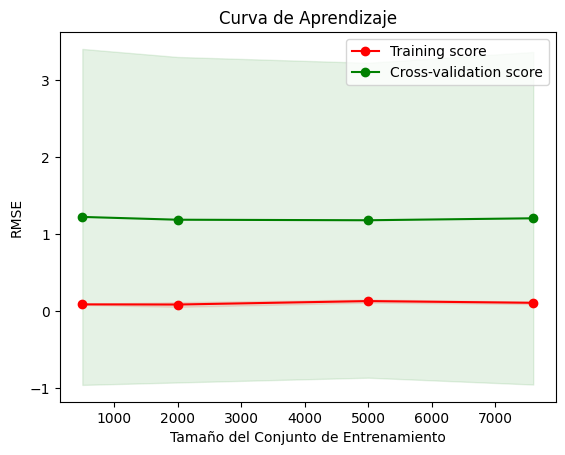

In [71]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Definir los tamaños de los conjuntos de entrenamiento para los cuales quieres evaluar el modelo
train_sizes = [1, 100, 500, 2000, 5000, 7600]  # Puedes ajustar según la cantidad de datos que tengas

# Usar la función learning_curve de sklearn para calcular los puntajes de entrenamiento y de prueba
train_sizes, train_scores, test_scores = learning_curve(
    CatBoostRegressor(iterations=100, depth=5, learning_rate=0.1, loss_function='RMSE', verbose=False),
    X, Y,
    cv=fold_count,
    scoring='neg_mean_squared_error',  # Establecer la métrica de evaluación
    n_jobs=-1,  # Usar todos los procesadores disponibles
    train_sizes=train_sizes,
    fit_params={'cat_features': cat_features}  # Pasar 'cat_features' como parámetros de ajuste
)

# Calcular la media y la desviación estándar de los puntajes de entrenamiento y de prueba
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Graficar la curva de aprendizaje
plt.figure()
plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('RMSE')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.legend(loc='best')
plt.show()


La curva de aprendizaje que has proporcionado muestra dos tendencias principales para los puntajes de entrenamiento (en rojo) y los de validación cruzada (en verde) en relación con el tamaño del conjunto de entrenamiento.

1. **Puntaje de Entrenamiento (Training score):** La línea roja representa la puntuación de entrenamiento y se mantiene relativamente constante a medida que aumenta el tamaño del conjunto de entrenamiento. Esto sugiere que el modelo se ajusta bien a los datos de entrenamiento, independientemente del tamaño del conjunto de datos. La puntuación es muy alta (cerca de 0 en la escala de RMSE negativo), lo que podría indicar un sobreajuste, ya que el modelo se desempeña casi perfectamente en los datos de entrenamiento.

2. **Puntaje de Validación Cruzada (Cross-validation score):** La línea verde muestra el puntaje de validación cruzada, que también es bastante constante y no muestra una tendencia significativa de mejora a medida que se aumenta el tamaño del conjunto de entrenamiento. Sin embargo, hay una brecha considerable entre el puntaje de entrenamiento y el de validación, lo que indica que el modelo no generaliza tan bien a nuevos datos como lo hace con los datos de entrenamiento.

**Interpretación:**

- **Brecha entre las puntuaciones:** La brecha entre las puntuaciones de entrenamiento y validación sugiere que el modelo podría estar sobreajustado. Un modelo sobreajustado funcionará excepcionalmente bien en los datos de entrenamiento, pero su rendimiento disminuye significativamente en los datos de validación.

- **No mejora con más datos:** El hecho de que el puntaje de validación no mejore con más datos de entrenamiento podría indicar que simplemente añadir más datos no está ayudando al modelo a generalizar mejor. Esto podría ser un signo de que se necesitan cambios en el modelo (como ajustar los hiperparámetros, usar un modelo diferente o añadir más características) en lugar de más datos de entrenamiento.

- **Consideraciones adicionales:** Dado que los puntajes de RMSE son negativos (lo que no es posible para esta métrica), esto indica que se usó una función de puntuación de error negativo durante el cálculo de la curva de aprendizaje, lo que es común en scikit-learn. La magnitud de los valores es importante aquí, no el signo. 

**Siguiente paso:** Podrías intentar regularizar más el modelo para tratar de evitar el sobreajuste o probar un modelo diferente que pueda tener un mejor rendimiento de generalización. También podría ser útil realizar una búsqueda más exhaustiva de hiperparámetros o usar técnicas de ensamblaje para mejorar la generalización.

# Modelo Random forest -ski-learn

In [53]:
import pandas as pd
data = pd.read_csv("EDA_sin_outliers1.csv")
data.head()

,Unnamed: 0,fecha,codigo,talla,color,coleccion,categoria,linea,cantidad,ciudad,refext,clase de cliente,TD,IPC,precio,anio,mes,dia_semana,ISE_pca
0,0,2020-02-29,156,12m,miniprint,cd192,jogger bb,nino,1.0,cali - valle del cauca,julian,grandes superficies,12.813129,3.72,40957.0,2020,2,5,3.008595
1,1,2020-02-29,156,12m,rojo,cd191,camiseta pol bb,nino,1.0,cali - valle del cauca,alan,grandes superficies,12.813129,3.72,14417.5,2020,2,5,3.008595
2,2,2020-02-29,156,3t.,blanco,cd191,camiseta pol bb,nino,1.0,cali - valle del cauca,alan,grandes superficies,12.813129,3.72,26823.0,2020,2,5,3.008595
3,3,2020-02-29,156,3t.,lavado osc,cd191,bermuda bb,nino,2.0,cali - valle del cauca,marcelo,grandes superficies,12.813129,3.72,17461.2,2020,2,5,3.008595
4,4,2020-02-29,156,5t.,blanco,cd191,bermuda bb,nino,1.0,cali - valle del cauca,joaquin -220140083,grandes superficies,12.813129,3.72,36215.0,2020,2,5,3.008595


In [54]:
data.head()
data = data.drop(['Unnamed: 0'], axis=1)

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error 
import matplotlib.pyplot as plt

In [56]:
# Factorización de variables categóricas
categorical_columns = ['talla', 'color', 'coleccion', 'categoria', 'linea', 'ciudad', 'refext', 'clase de cliente']
mapeos = {}
for col in categorical_columns:
    data[col], mapeo_temp = pd.factorize(data[col])
    mapeos[col] = mapeo_temp
data.head()

,fecha,codigo,talla,color,coleccion,categoria,linea,cantidad,ciudad,refext,clase de cliente,TD,IPC,precio,anio,mes,dia_semana,ISE_pca
0,2020-02-29,156,0,0,0,0,0,1.0,0,0,0,12.813129,3.72,40957.0,2020,2,5,3.008595
1,2020-02-29,156,0,1,1,1,0,1.0,0,1,0,12.813129,3.72,14417.5,2020,2,5,3.008595
2,2020-02-29,156,1,2,1,1,0,1.0,0,1,0,12.813129,3.72,26823.0,2020,2,5,3.008595
3,2020-02-29,156,1,3,1,2,0,2.0,0,2,0,12.813129,3.72,17461.2,2020,2,5,3.008595
4,2020-02-29,156,2,2,1,2,0,1.0,0,3,0,12.813129,3.72,36215.0,2020,2,5,3.008595


In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
 
# Definir las variables X e Y
X = data.drop(['cantidad', 'fecha'], axis=1)  # Incluye las columnas categóricas factorizadas
Y = data['cantidad']  # Asumiendo que 'cantidad' es tu variable objetivo
 
# Dividir los datos en conjuntos de entrenamiento y validación (70% entrenamiento, 30% validación)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30, random_state=42)
 
# Entrenar un modelo RandomForest simplificado
rf_simplificado = RandomForestRegressor(n_estimators=150, max_depth=8, random_state=42)
rf_simplificado.fit(X_train, Y_train)
 
# Hacer predicciones en el conjunto de entrenamiento y validación
Y_pred_train_simplificado = rf_simplificado.predict(X_train)
Y_pred_val_simplificado = rf_simplificado.predict(X_val)
 
# Calcular las métricas para el modelo simplificado
r2_train_simplificado = r2_score(Y_train, Y_pred_train_simplificado)
r2_val_simplificado = r2_score(Y_val, Y_pred_val_simplificado)
mse_train_simplificado = mean_squared_error(Y_train, Y_pred_train_simplificado)
mse_val_simplificado = mean_squared_error(Y_val, Y_pred_val_simplificado)
mape_train_simplificado = mean_absolute_percentage_error(Y_train, Y_pred_train_simplificado)
mape_val_simplificado = mean_absolute_percentage_error(Y_val, Y_pred_val_simplificado)
 
# Imprimir los resultados para el modelo simplificado
print(f"R2 score (entrenamiento, simplificado): {r2_train_simplificado:.2f}")
print(f"R2 score (validación, simplificado): {r2_val_simplificado:.2f}")
print(f"MSE (entrenamiento, simplificado): {mse_train_simplificado:.2f}")
print(f"MSE (validación, simplificado): {mse_val_simplificado:.2f}")
print(f"MAPE (entrenamiento, simplificado): {mape_train_simplificado:.2f}")
print(f"MAPE (validación, simplificado): {mape_val_simplificado:.2f}")

R2 score (entrenamiento, simplificado): 0.77
R2 score (validación, simplificado): 0.78
MSE (entrenamiento, simplificado): 0.26
MSE (validación, simplificado): 0.27
MAPE (entrenamiento, simplificado): 0.17
MAPE (validación, simplificado): 0.17


### Importancia de las variables

In [58]:
# 1. Entrenar el modelo
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train)
 
# 2. Obtener la importancia de las variables
feature_importances = rf.feature_importances_
 
# Crear un DataFrame para visualizar mejor la importancia de las características
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
 
# Ordenar las variables por importancia
features_df = features_df.sort_values(by='Importance', ascending=False)
 
# Imprimir el DataFrame
print(features_df)

             Feature  Importance
0             codigo    0.227190
8   clase de cliente    0.211413
11            precio    0.130368
6             ciudad    0.126584
9                 TD    0.079594
1              talla    0.047268
7             refext    0.027755
2              color    0.025018
10               IPC    0.022483
14        dia_semana    0.020379
4          categoria    0.019807
3          coleccion    0.019373
15           ISE_pca    0.018284
13               mes    0.012155
12              anio    0.008336
5              linea    0.003994


### Curva de aprendizaje

In [59]:
#Curva de aprendizaje
 
from sklearn.model_selection import learning_curve
 
# Definir el modelo
rf = RandomForestRegressor(random_state=42)
 
# Aplicar la curva de aprendizaje
train_size_abs, train_scores, test_scores = learning_curve(
    rf, X_train, Y_train, train_sizes=[0.3, 0.6, 0.9], cv=5, scoring='r2'
)
 
# Imprimir los resultados
for train_size, cv_train_scores, cv_test_scores in zip(train_size_abs, train_scores, test_scores):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train R2 score is {cv_train_scores.mean():.2f}")
    print(f"The average test R2 score is {cv_test_scores.mean():.2f}")

35454 samples were used to train the model
The average train R2 score is 0.98
The average test R2 score is 0.85
70908 samples were used to train the model
The average train R2 score is 0.98
The average test R2 score is 0.88
106362 samples were used to train the model
The average train R2 score is 0.99
The average test R2 score is 0.90


### Validación cruzada

In [60]:

import numpy as np

from sklearn.model_selection import cross_val_score

X = data.drop(['cantidad', 'fecha'], axis=1)  # Incluye las columnas categóricas factorizadas

Y = data['cantidad']  # Asumiendo que 'cantidad' es tu variable objetivo
 
# Crea una instancia de RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
 
k = 5  # Número de folds

# Calcula los puntajes de validación cruzada

cv_scores = cross_val_score(rf, X, Y, cv=k, scoring='neg_mean_squared_error')
 
# Convierte los puntajes a RMSE (Root Mean Squared Error)

rmse_scores = np.sqrt(-cv_scores)
 
# Calcula el promedio y la desviación estándar de los puntajes RMSE

rmse_mean = rmse_scores.mean()

rmse_std = rmse_scores.std()
 
print("RMSE scores:", rmse_scores)

print("RMSE mean:", rmse_mean)

print("RMSE standard deviation:", rmse_std)

RMSE scores: [0.44436598 0.33102976 0.32074304 0.34739198 2.36705168]
RMSE mean: 0.7621164896155811
RMSE standard deviation: 0.8036697146728856


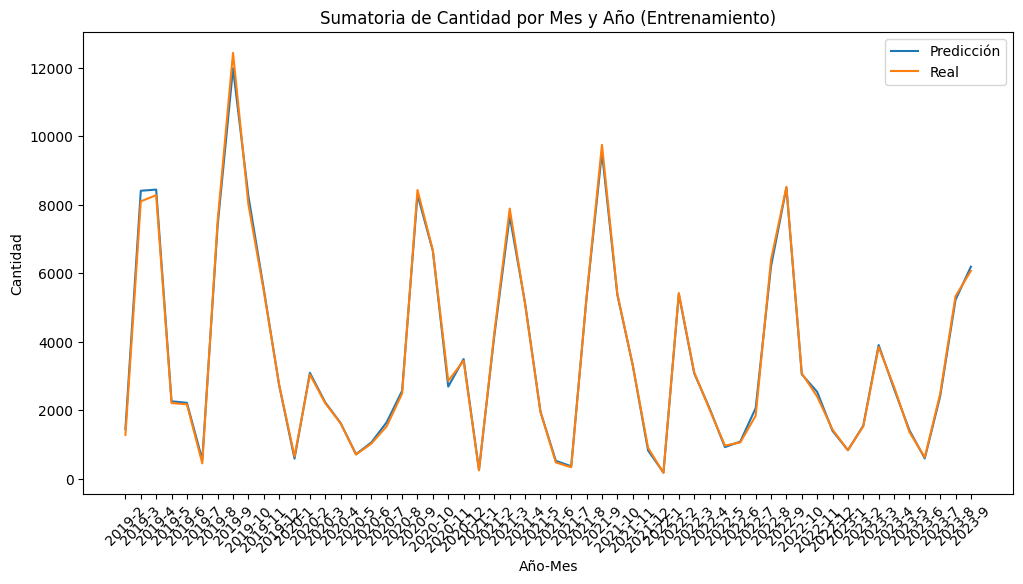

In [61]:
# Asegurarse de que la columna de fecha es del tipo datetime
data['fecha'] = pd.to_datetime(data['fecha'])
# Extraer año y mes
data['anio'] = data['fecha'].dt.year
data['mes'] = data['fecha'].dt.month

# Incluir estas columnas en X
X['anio'] = data['anio']
X['mes'] = data['mes']

# Agregar las predicciones al conjunto de entrenamiento y validación
X_train['cantidad_pred'] = Y_pred_train_simplificado
X_val['cantidad_pred'] = Y_pred_val_simplificado
 
# También agregar los valores reales de Y para comparación
X_train['cantidad_real'] = Y_train
X_val['cantidad_real'] = Y_val
 
# Para entrenamiento
train_grouped = X_train.groupby(['anio', 'mes']).agg({'cantidad_pred': 'sum', 'cantidad_real': 'sum'}).reset_index()
 
# Para validación
val_grouped = X_val.groupby(['anio', 'mes']).agg({'cantidad_pred': 'sum', 'cantidad_real': 'sum'}).reset_index()
 
import matplotlib.pyplot as plt
 
# Gráfica para el conjunto de entrenamiento
plt.figure(figsize=(12, 6))
plt.plot(train_grouped['anio'].astype(str) + '-' + train_grouped['mes'].astype(str), train_grouped['cantidad_pred'], label='Predicción')
plt.plot(train_grouped['anio'].astype(str) + '-' + train_grouped['mes'].astype(str), train_grouped['cantidad_real'], label='Real')
plt.xticks(rotation=45)
plt.xlabel('Año-Mes')
plt.ylabel('Cantidad')
plt.title('Sumatoria de Cantidad por Mes y Año (Entrenamiento)')
plt.legend()
plt.show()
 
# Similar para el conjunto de validación si es necesario

## Selección de MODELO

* Random Forest tiene buenos valores de R2 tanto en entrenamiento como en validación, y el MSE es bajo. Además, el MAPE es bajo, lo que indica un buen rendimiento en términos de errores porcentuales medios absolutos. 
* CatBoost tiene un RMSE bastante bajo, lo que indica un buen ajuste a los datos. Sin embargo, el MAPE es alto, lo que sugiere que las predicciones pueden no ser tan precisas en términos de errores porcentuales medios absolutos.
* Los Árboles de Decisión con parámetros modificados tienen buenos valores de R2 y MSE tanto en entrenamiento como en prueba, pero el MAPE es más alto que en el modelo Random Forest.

Se selecciona **el modelo Random Forest** , debido a su buen rendimiento en métricas y su capacidad para generalizar bien en el conjunto de validación.

### Predicción de 6 meses futuros

In [1]:
#Librerias
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df_ajustado = pd.read_csv("EDA_sin_outliers-2.csv")
df_ajustado.head()

,Unnamed: 0,fecha,codigo,talla,color,coleccion,categoria,linea,cantidad,ciudad,refext,clase de cliente,TD,IPC,precio,anio,mes,dia_semana,ISE_pca
0,0,2020-02-29,156,12m,miniprint,cd192,jogger bb,nino,1.0,cali - valle del cauca,julian,grandes superficies,12.813129,3.72,40957.0,2020,2,5,3.008595
1,1,2020-02-29,156,12m,rojo,cd191,camiseta pol bb,nino,1.0,cali - valle del cauca,alan,grandes superficies,12.813129,3.72,14417.5,2020,2,5,3.008595
2,2,2020-02-29,156,3t.,blanco,cd191,camiseta pol bb,nino,1.0,cali - valle del cauca,alan,grandes superficies,12.813129,3.72,26823.0,2020,2,5,3.008595
3,3,2020-02-29,156,3t.,lavado osc,cd191,bermuda bb,nino,2.0,cali - valle del cauca,marcelo,grandes superficies,12.813129,3.72,17461.2,2020,2,5,3.008595
4,4,2020-02-29,156,5t.,blanco,cd191,bermuda bb,nino,1.0,cali - valle del cauca,joaquin -220140083,grandes superficies,12.813129,3.72,36215.0,2020,2,5,3.008595


In [3]:
df_ajustado.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df_ajustado.head()

,fecha,codigo,talla,color,coleccion,categoria,linea,cantidad,ciudad,refext,clase de cliente,TD,IPC,precio,anio,mes,dia_semana,ISE_pca
0,2020-02-29,156,12m,miniprint,cd192,jogger bb,nino,1.0,cali - valle del cauca,julian,grandes superficies,12.813129,3.72,40957.0,2020,2,5,3.008595
1,2020-02-29,156,12m,rojo,cd191,camiseta pol bb,nino,1.0,cali - valle del cauca,alan,grandes superficies,12.813129,3.72,14417.5,2020,2,5,3.008595
2,2020-02-29,156,3t.,blanco,cd191,camiseta pol bb,nino,1.0,cali - valle del cauca,alan,grandes superficies,12.813129,3.72,26823.0,2020,2,5,3.008595
3,2020-02-29,156,3t.,lavado osc,cd191,bermuda bb,nino,2.0,cali - valle del cauca,marcelo,grandes superficies,12.813129,3.72,17461.2,2020,2,5,3.008595
4,2020-02-29,156,5t.,blanco,cd191,bermuda bb,nino,1.0,cali - valle del cauca,joaquin -220140083,grandes superficies,12.813129,3.72,36215.0,2020,2,5,3.008595


In [5]:
categorical_columns = ['talla', 'color', 'coleccion', 'categoria', 'linea', 'ciudad', 'refext', 'clase de cliente']
mapeos = {}
for col in categorical_columns:
    # Se factoriza manteniendo NaN como NaN
    df_ajustado[col], mapeo_temp = pd.factorize(df_ajustado[col], na_sentinel=np.nan)
    mapeos[col] = mapeo_temp

,fecha,codigo,talla,color,coleccion,categoria,linea,cantidad,ciudad,refext,clase de cliente,TD,IPC,precio,anio,mes,dia_semana,ISE_pca
0,2020-02-29,156,0,0,0,0,0,1.0,0,0,0,12.813129,3.72,40957.0,2020,2,5,3.008595
1,2020-02-29,156,0,1,1,1,0,1.0,0,1,0,12.813129,3.72,14417.5,2020,2,5,3.008595
2,2020-02-29,156,1,2,1,1,0,1.0,0,1,0,12.813129,3.72,26823.0,2020,2,5,3.008595
3,2020-02-29,156,1,3,1,2,0,2.0,0,2,0,12.813129,3.72,17461.2,2020,2,5,3.008595
4,2020-02-29,156,2,2,1,2,0,1.0,0,3,0,12.813129,3.72,36215.0,2020,2,5,3.008595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211034,2019-10-01,143,10,3,0,7,0,1.0,6,9,2,10.123633,3.86,49900.0,2019,10,1,2.597675
211035,2019-10-01,143,7,3,0,7,0,2.0,6,9,2,10.123633,3.86,24950.0,2019,10,1,2.597675
211036,2019-09-30,143,9,1,0,28,0,1.0,6,48,2,10.800322,3.82,33900.0,2019,9,0,5.533799
211037,2019-09-30,143,8,1,0,28,0,1.0,6,48,2,10.800322,3.82,33900.0,2019,9,0,5.533799


In [6]:
# Definir las variables X e Y
X = df_ajustado.drop(['cantidad', 'fecha'], axis=1) 
Y = df_ajustado['cantidad']  

# Dividir los datos en conjuntos de entrenamiento y validación (70% entrenamiento, 30% validación)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30, random_state=42)

# Entrenar un modelo RandomForest simplificado
rf_simplificado = RandomForestRegressor(n_estimators=150, max_depth=8, random_state=42)
rf_simplificado.fit(X_train, Y_train)

# Hacer predicciones en el conjunto de entrenamiento y validación
Y_pred_train_simplificado = rf_simplificado.predict(X_train)
Y_pred_val_simplificado = rf_simplificado.predict(X_val)

# Calcular las métricas para el modelo simplificado
r2_train_simplificado = r2_score(Y_train, Y_pred_train_simplificado)
r2_val_simplificado = r2_score(Y_val, Y_pred_val_simplificado)
mse_train_simplificado = mean_squared_error(Y_train, Y_pred_train_simplificado)
mse_val_simplificado = mean_squared_error(Y_val, Y_pred_val_simplificado)
mape_train_simplificado = mean_absolute_percentage_error(Y_train, Y_pred_train_simplificado)
mape_val_simplificado = mean_absolute_percentage_error(Y_val, Y_pred_val_simplificado)

# Imprimir los resultados para el modelo simplificado
print(f"R2 score (entrenamiento, simplificado): {r2_train_simplificado:.2f}")
print(f"R2 score (validación, simplificado): {r2_val_simplificado:.2f}")
print(f"MSE (entrenamiento, simplificado): {mse_train_simplificado:.2f}")
print(f"MSE (validación, simplificado): {mse_val_simplificado:.2f}")
print(f"MAPE (entrenamiento, simplificado): {mape_train_simplificado:.2f}")
print(f"MAPE (validación, simplificado): {mape_val_simplificado:.2f}")


R2 score (entrenamiento, simplificado): 0.77
R2 score (validación, simplificado): 0.78
MSE (entrenamiento, simplificado): 0.26
MSE (validación, simplificado): 0.27
MAPE (entrenamiento, simplificado): 0.17
MAPE (validación, simplificado): 0.17


### Inicia preparacion de dataset para proyectar t + 6 (6 meses futuros)

In [7]:
df_ajustado['fecha'] = pd.to_datetime(df_ajustado['fecha'])

# Agrega la columna 'Fecha_t_mas_6' al DataFrame original
df_ajustado['Fecha_t_mas_6'] = df_ajustado['fecha'] + pd.DateOffset(months=6)
df_ajustado.head()

,fecha,codigo,talla,color,coleccion,categoria,linea,cantidad,ciudad,refext,clase de cliente,TD,IPC,precio,anio,mes,dia_semana,ISE_pca,Fecha_t_mas_6
0,2020-02-29,156,0,0,0,0,0,1.0,0,0,0,12.813129,3.72,40957.0,2020,2,5,3.008595,2020-08-29
1,2020-02-29,156,0,1,1,1,0,1.0,0,1,0,12.813129,3.72,14417.5,2020,2,5,3.008595,2020-08-29
2,2020-02-29,156,1,2,1,1,0,1.0,0,1,0,12.813129,3.72,26823.0,2020,2,5,3.008595,2020-08-29
3,2020-02-29,156,1,3,1,2,0,2.0,0,2,0,12.813129,3.72,17461.2,2020,2,5,3.008595,2020-08-29
4,2020-02-29,156,2,2,1,2,0,1.0,0,3,0,12.813129,3.72,36215.0,2020,2,5,3.008595,2020-08-29


In [8]:
# Extraer el mes de 'Fecha_t_mas_6' y asignarlo a una nueva columna 'Mes_t_mas_6'
df_ajustado['Mes_t_mas_6'] = df_ajustado['Fecha_t_mas_6'].dt.month

# Extraer el año de 'Fecha_t_mas_6' y asignarlo a una nueva columna 'Año_t_mas_6'
df_ajustado['Año_t_mas_6'] = df_ajustado['Fecha_t_mas_6'].dt.year

df_ajustado.head()

,fecha,codigo,talla,color,coleccion,categoria,linea,cantidad,ciudad,refext,...,TD,IPC,precio,anio,mes,dia_semana,ISE_pca,Fecha_t_mas_6,Mes_t_mas_6,Año_t_mas_6
0,2020-02-29,156,0,0,0,0,0,1.0,0,0,...,12.813129,3.72,40957.0,2020,2,5,3.008595,2020-08-29,8,2020
1,2020-02-29,156,0,1,1,1,0,1.0,0,1,...,12.813129,3.72,14417.5,2020,2,5,3.008595,2020-08-29,8,2020
2,2020-02-29,156,1,2,1,1,0,1.0,0,1,...,12.813129,3.72,26823.0,2020,2,5,3.008595,2020-08-29,8,2020
3,2020-02-29,156,1,3,1,2,0,2.0,0,2,...,12.813129,3.72,17461.2,2020,2,5,3.008595,2020-08-29,8,2020
4,2020-02-29,156,2,2,1,2,0,1.0,0,3,...,12.813129,3.72,36215.0,2020,2,5,3.008595,2020-08-29,8,2020


In [9]:
# Inicializar df_Y_mas_6 para guardar los resultados
df_Y_mas_6 = pd.DataFrame(columns=['Fecha_Y_mas_6', 'Referencia', 'Valor_Y_mas_6_Promedio'])

# Iterar sobre referencias únicas y fechas
for ref in df_ajustado['refext'].unique():
    for fecha in df_ajustado['Fecha_t_mas_6'].unique():
        # Filtrar valores para esta referencia y fecha
        valores_filtrados = df_ajustado[(df_ajustado['refext'] == ref) & (df_ajustado['Fecha_t_mas_6'] == fecha)]['cantidad']
        
        # Si se encuentran valores, calcular el promedio y agregarlo a df_Y_mas_6
        if len(valores_filtrados) > 0:
            promedio_valor_Y_mas_6 = valores_filtrados.mean()
            df_Y_mas_6 = pd.concat([df_Y_mas_6, pd.DataFrame({'Fecha_Y_mas_6': [fecha], 'Referencia': [ref], 'Valor_Y_mas_6_Promedio': [promedio_valor_Y_mas_6]})])

# Muestra el DataFrame resultante
print(df_Y_mas_6)

   Fecha_Y_mas_6 Referencia  Valor_Y_mas_6_Promedio
0     2020-08-29          0                1.000000
0     2020-07-29          0                1.000000
0     2020-09-10          0                1.000000
0     2020-08-11          0                1.000000
0     2021-09-30          0                1.600000
..           ...        ...                     ...
0     2022-10-04        425                1.911111
0     2022-10-25        426                1.000000
0     2022-10-04        426                1.363636
0     2023-10-25        427                2.054545
0     2023-10-25        428                2.053030

[22463 rows x 3 columns]


Operación de agrupación y cálculo de promedios en un conjunto de datos, enfocado en proyectar valores futuros para un período de seis meses

In [10]:
# Merge df_Y_mas_6 con df_ajustado
df_ajustado = pd.merge(df_ajustado, df_Y_mas_6, left_on=['Fecha_t_mas_6', 'refext'], right_on=['Fecha_Y_mas_6', 'Referencia'], how='left')

print(df_ajustado.head())

       fecha  codigo  talla  color  coleccion  categoria  linea  cantidad  \
0 2020-02-29     156      0      0          0          0      0       1.0   
1 2020-02-29     156      0      1          1          1      0       1.0   
2 2020-02-29     156      1      2          1          1      0       1.0   
3 2020-02-29     156      1      3          1          2      0       2.0   
4 2020-02-29     156      2      2          1          2      0       1.0   

   ciudad refext  ...  anio  mes  dia_semana   ISE_pca  Fecha_t_mas_6  \
0       0      0  ...  2020    2           5  3.008595     2020-08-29   
1       0      1  ...  2020    2           5  3.008595     2020-08-29   
2       0      1  ...  2020    2           5  3.008595     2020-08-29   
3       0      2  ...  2020    2           5  3.008595     2020-08-29   
4       0      3  ...  2020    2           5  3.008595     2020-08-29   

   Mes_t_mas_6  Año_t_mas_6  Fecha_Y_mas_6 Referencia  Valor_Y_mas_6_Promedio  
0            8    

In [11]:
# Inicializa un LabelEncoder
label_encoder = LabelEncoder()

In [12]:
# Aplica Label Encoding a la columna 'fecha'
df_ajustado['fecha_encoded'] = label_encoder.fit_transform(df_ajustado['fecha'])

In [13]:
print(df_ajustado.dtypes)

fecha                     datetime64[ns]
codigo                             int64
talla                              int64
color                              int64
coleccion                          int64
categoria                          int64
linea                              int64
cantidad                         float64
ciudad                             int64
refext                            object
clase de cliente                   int64
TD                               float64
IPC                              float64
precio                           float64
anio                               int64
mes                                int64
dia_semana                         int64
ISE_pca                          float64
Fecha_t_mas_6             datetime64[ns]
Mes_t_mas_6                        int64
Año_t_mas_6                        int64
Fecha_Y_mas_6             datetime64[ns]
Referencia                        object
Valor_Y_mas_6_Promedio           float64
fecha_encoded   

In [14]:
# Elimina la columna 'fecha' antes de dividir datos
X = df_ajustado.drop(['cantidad', 'fecha'], axis=1)
y = df_ajustado['cantidad']

# Convierte las columnas datetime a valores numéricos
X['Fecha_t_mas_6'] = X['Fecha_t_mas_6'].astype(int)
X['Fecha_Y_mas_6'] = X['Fecha_Y_mas_6'].astype(int)

# Divide en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializa el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=150, max_depth=8, random_state=42)

# Entrena el modelo Random Forest
rf_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de entrenamiento
y_pred_train = rf_model.predict(X_train)

# Realiza predicciones en el conjunto de prueba
y_pred_test = rf_model.predict(X_test)

# Crea DataFrames separados para las predicciones en entrenamiento y prueba
df_pred_train = pd.DataFrame({'cantidad_pred_train': y_pred_train}, index=X_train.index)
df_pred_test = pd.DataFrame({'cantidad_pred_test': y_pred_test}, index=X_test.index)

# Une los DataFrames de predicciones al DataFrame original
df_ajustado = pd.concat([df_ajustado, df_pred_train, df_pred_test], axis=1)

# Muestra todas las columnas junto con las predicciones
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
print(df_ajustado)

            fecha  codigo  talla  color  coleccion  categoria  linea  \
0      2020-02-29     156      0      0          0          0      0   
1      2020-02-29     156      0      1          1          1      0   
2      2020-02-29     156      1      2          1          1      0   
3      2020-02-29     156      1      3          1          2      0   
4      2020-02-29     156      2      2          1          2      0   
...           ...     ...    ...    ...        ...        ...    ...   
211034 2019-10-01     143     10      3          0          7      0   
211035 2019-10-01     143      7      3          0          7      0   
211036 2019-09-30     143      9      1          0         28      0   
211037 2019-09-30     143      8      1          0         28      0   
211038 2019-09-30     143     10      1          0         28      0   

        cantidad  ciudad refext  clase de cliente         TD   IPC   precio  \
0            1.0       0      0                 0  12.81

In [15]:
# Reemplazar NaN por 0 en las columnas cantidad_pred_train y cantidad_pred_test
df_ajustado['cantidad_pred_train'].fillna(0, inplace=True)
df_ajustado['cantidad_pred_test'].fillna(0, inplace=True)

# Muestra todas las columnas junto con las predicciones
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
print(df_ajustado)

            fecha  codigo  talla  color  coleccion  categoria  linea  \
0      2020-02-29     156      0      0          0          0      0   
1      2020-02-29     156      0      1          1          1      0   
2      2020-02-29     156      1      2          1          1      0   
3      2020-02-29     156      1      3          1          2      0   
4      2020-02-29     156      2      2          1          2      0   
...           ...     ...    ...    ...        ...        ...    ...   
211034 2019-10-01     143     10      3          0          7      0   
211035 2019-10-01     143      7      3          0          7      0   
211036 2019-09-30     143      9      1          0         28      0   
211037 2019-09-30     143      8      1          0         28      0   
211038 2019-09-30     143     10      1          0         28      0   

        cantidad  ciudad refext  clase de cliente         TD   IPC   precio  \
0            1.0       0      0                 0  12.81

In [16]:
# Muestra todas las columnas junto con las predicciones
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
print(df_ajustado)

            fecha  codigo  talla  color  coleccion  categoria  linea  \
0      2020-02-29     156      0      0          0          0      0   
1      2020-02-29     156      0      1          1          1      0   
2      2020-02-29     156      1      2          1          1      0   
3      2020-02-29     156      1      3          1          2      0   
4      2020-02-29     156      2      2          1          2      0   
...           ...     ...    ...    ...        ...        ...    ...   
211034 2019-10-01     143     10      3          0          7      0   
211035 2019-10-01     143      7      3          0          7      0   
211036 2019-09-30     143      9      1          0         28      0   
211037 2019-09-30     143      8      1          0         28      0   
211038 2019-09-30     143     10      1          0         28      0   

        cantidad  ciudad refext  clase de cliente         TD   IPC   precio  \
0            1.0       0      0                 0  12.81

In [20]:
# Invierte la factorización para cada columna categórica
for col in categorical_columns:
    # Mapeo inverso: índices a categorías originales, manteniendo NaN
    inverso_mapeo = {indice: categoria for indice, categoria in enumerate(mapeos[col]) if indice != -1}
    inverso_mapeo[np.nan] = np.nan  # Asegurar que NaN se mapea a NaN
    df_ajustado[col] = df_ajustado[col].map(inverso_mapeo)

In [21]:
df_ajustado.head()

,fecha,codigo,talla,color,coleccion,categoria,linea,cantidad,ciudad,refext,clase de cliente,TD,IPC,precio,anio,mes,dia_semana,ISE_pca,Fecha_t_mas_6,Mes_t_mas_6,Año_t_mas_6,Fecha_Y_mas_6,Referencia,Valor_Y_mas_6_Promedio,fecha_encoded,cantidad_pred_train,cantidad_pred_test
0,2020-02-29,156,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,12.813129,3.72,40957.0,2020,2,5,3.008595,2020-08-29,8,2020,2020-08-29,0,1.00,192,1.000000,0.0
1,2020-02-29,156,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,12.813129,3.72,14417.5,2020,2,5,3.008595,2020-08-29,8,2020,2020-08-29,1,1.00,192,1.000000,0.0
2,2020-02-29,156,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,12.813129,3.72,26823.0,2020,2,5,3.008595,2020-08-29,8,2020,2020-08-29,1,1.00,192,1.000000,0.0
3,2020-02-29,156,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,12.813129,3.72,17461.2,2020,2,5,3.008595,2020-08-29,8,2020,2020-08-29,2,1.25,192,1.277927,0.0
4,2020-02-29,156,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,12.813129,3.72,36215.0,2020,2,5,3.008595,2020-08-29,8,2020,2020-08-29,3,1.00,192,0.000000,1.0


In [19]:
### Visualizaciones

In [22]:
# Suma las columnas y crea la nueva columna 'prediccion'
df_ajustado['prediccion'] = df_ajustado['cantidad_pred_train'] + df_ajustado['cantidad_pred_test']

In [23]:
print (df_ajustado.columns)

Index(['fecha', 'codigo', 'talla', 'color', 'coleccion', 'categoria', 'linea',
       'cantidad', 'ciudad', 'refext', 'clase de cliente', 'TD', 'IPC',
       'precio', 'anio', 'mes', 'dia_semana', 'ISE_pca', 'Fecha_t_mas_6',
       'Mes_t_mas_6', 'Año_t_mas_6', 'Fecha_Y_mas_6', 'Referencia',
       'Valor_Y_mas_6_Promedio', 'fecha_encoded', 'cantidad_pred_train',
       'cantidad_pred_test', 'prediccion'],
      dtype='object')


In [24]:
# Agrupar por 'Año_t_mas_6' y 'Mes_t_mas_6', y luego sumar 'prediccion'
agrupado = df_ajustado.groupby(['Año_t_mas_6', 'Mes_t_mas_6'])['prediccion'].sum()

# Ordenar los resultados por año y mes
agrupado_ordenado = agrupado.sort_index()

# Mostrar el resultado
print(agrupado_ordenado)

Año_t_mas_6  Mes_t_mas_6
2019         8               1883.963117
             9              11566.182877
             10             11958.513443
             11              3345.095670
             12              3079.079113
2020         1                703.528865
             2              10648.278910
             3              17633.041533
             4              11470.082599
             5               7974.103666
             6               3955.946072
             7                899.673138
             8               4311.111025
             9               3191.738932
             10              2275.788745
             11              1014.288920
             12              1447.725724
2021         1               2295.536766
             2               3564.951627
             3              12002.730323
             4               9319.418374
             5               4257.194082
             6               5030.065243
             7                33

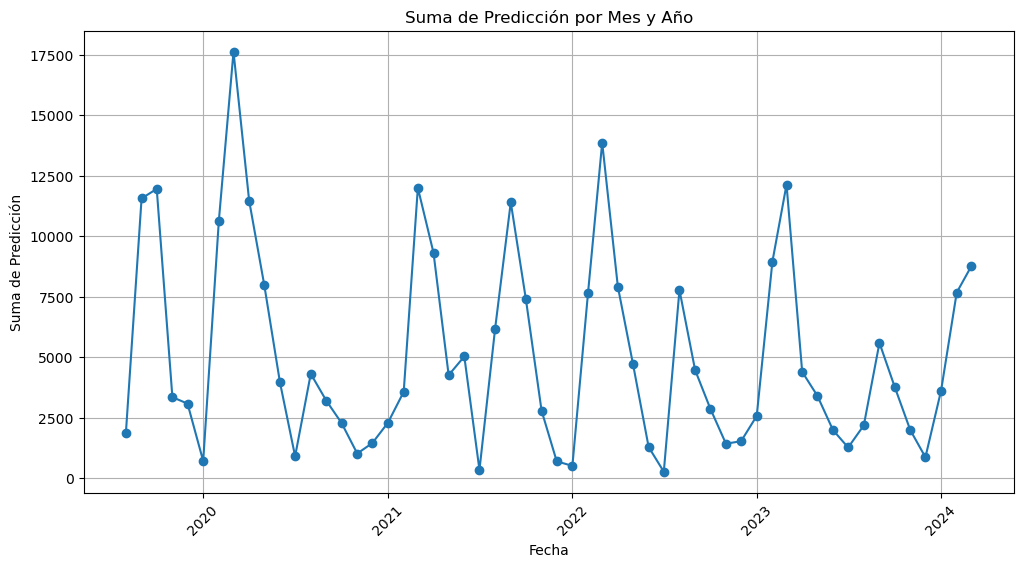

In [26]:
# Agrupar por 'Año_t_mas_6' y 'Mes_t_mas_6', y luego sumar 'prediccion'
agrupado = df_ajustado.groupby(['Año_t_mas_6', 'Mes_t_mas_6'])['prediccion'].sum()

# Ordenar los resultados por año y mes
agrupado_ordenado = agrupado.sort_index()

# Convertir el índice en una columna y resetear el índice para facilitar la graficación
agrupado_ordenado_df = agrupado_ordenado.reset_index()

# Crear una nueva columna 'Fecha' combinando año y mes
agrupado_ordenado_df['Fecha'] = pd.to_datetime(agrupado_ordenado_df['Año_t_mas_6'].astype(str) + '-' + agrupado_ordenado_df['Mes_t_mas_6'].astype(str))

# Ordenar por fecha para asegurarse de que la gráfica esté en orden cronológico
agrupado_ordenado_df = agrupado_ordenado_df.sort_values(by='Fecha')

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(agrupado_ordenado_df['Fecha'], agrupado_ordenado_df['prediccion'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Suma de Predicción')
plt.title('Suma de Predicción por Mes y Año')
plt.grid(True)
plt.show()

Acá se observa la proyección de 6 meses futuros y como se ajusta a la estacionalidad que presenta a través de los año la demanda en Codelin